# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for regression problem but in our case, 
we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter..predicting a number.


In [ ]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit

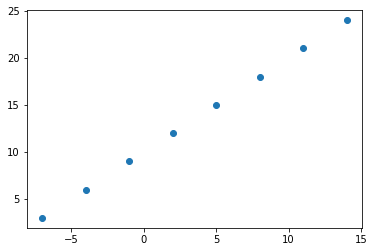

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# visualize it
plt.scatter(X,y)

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom","garage"])
house_price = tf.constant(939700)
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=939700>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays to tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape


(TensorShape([]), TensorShape([]))

## Steps in modelling in TensorFlow


1.  **Creating a model** - define the input and output layers, as well as the hidden layers or a deep learning model.
2.  **Compiling a model** - define the loss function (i.e. the function that tells our model how wrong is) and the optimizer (i.e tell our model how to improve the patterns it learns) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X & y(features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1,input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae=mean absolute error, i.e. comparison betwen actual and predicted values
              optimizer=tf.keras.optimizers.SGD(), #SGD= stochastic gradient descent
              metrics=["mae"])  
# 3. Fit the model
model.fit(X,y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 822ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 31ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 11 #11=mae result ~

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create the model

1. **Creating a model** -here we might add more layers, increase the nr of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function
3. **Fitting a model** -here we might fit a model for more epochs (increase the nr of laps/times to exe a trained model) or on more data (give other examples to learn from)


In [ ]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape=[1])
])

#2. compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. fit a model by increasing the laps, i.e. train for longer cycles
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 633ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 33ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================

In [ ]:
# Remind ourself of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model predictions has been improved
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
# Let's rebuild our model -version 2.0

# 1. Create a model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation=None,input_shape=[1]),
        tf.keras.layers.Dense(1, input_shape=[1])
])

#2. compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#3. fit a model by increasing the laps, i.e. train for longer cycles
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 826ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 7.3315 - mae: 7.3315
Epoch 11/100
1/1 [==============================] - 0s 12ms/st

In [ ]:
model.predict([17.0])

array([[26.58353]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you follow when building a neural network is: 

```
Build a model -> fit it->evaluate it -> tweak a model -> fit it -> evaluate it..........

````

When it comes to evaluation that you should memorize

> "Visualize, visualize, visualize"
* data- The data we are working with, what does it look like? *
* model -What does our model look like? *
* The training of a model - how does a model perform while it learns? *
* The predictions of a model - how do the predictions of a model line up agains  the ground truth (i.e. the original labels)? *

In [ ]:
# Make a bigger dataset

X = tf.range(-100,100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make the labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

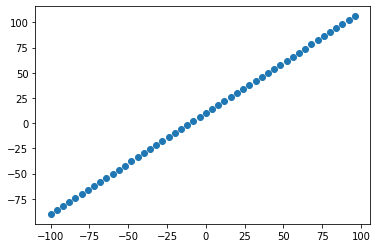

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets..

* **Training set** - the model learns from this data which is typically 70-80% of the total data you have available
* **Validation set**- the model gets tuned on this data, which is typically 10-15% of the available data
* **Test set**- the model gets evaluated on this data, to test what it has learned, this set is typically 10-15%

In [ ]:
# Check the length of the samples we have
len(X)


50

In [ ]:
# Split the data into training and test datasets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]
len(X_train), len(X_test)
len(y_train), len(y_test)

(40, 10)

### Visualising the data
Now we've got our data in training and test sets..let's visualize it again


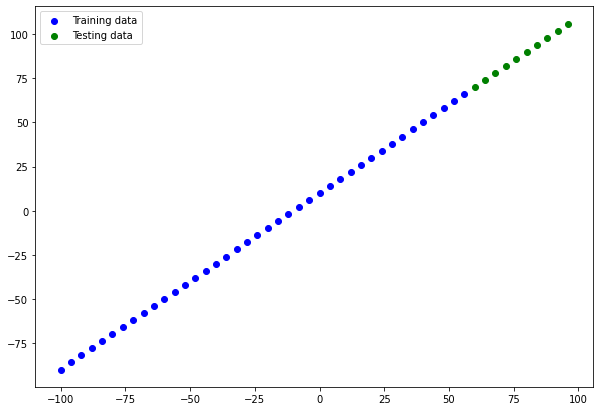

In [ ]:
plt.figure(figsize=(10,7))
# Plot training in blue
plt.scatter(X_train, y_train, c="b",label="Training data")

#Plot testing data
plt.scatter(X_test,y_test,c="g",label="Testing data")
#show a legend
plt.legend()

In [ ]:
# Let's have a look on how to build a neural netw for our data

# 1. create a model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, input_shape=[1], name="Input_layer"),
        tf.keras.layers.Dense(1, input_shape=[1], name="output_layer"),
], name="Our_first_model")
# 2. compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. fit the model
model.fit(X_train, y_train,epochs=100, verbose=1)
model.summary()

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 32.7206 - mae: 32.7206
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 27.5061 - mae: 27.5061
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 31.4580 - mae: 31.4580
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 13.9566 - mae: 13.9566
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 19.1430 - mae: 19.1430
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.5618 - mae: 9.5618
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 10.5667 - mae: 10.5667
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 12.9098 - mae: 12.9098
Epoch 9/100
2/2 [==============================] - 0s 29ms/step - loss: 33.9701 - mae: 33.9701
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 23.2680 - mae: 23.2680
Epoch 11/100
2/2 [==============================] - 0s 

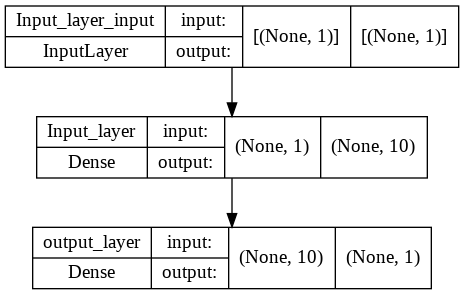

In [ ]:
from tensorflow.keras.utils import plot_model 

plot_model(model, show_shapes=True)


* Total params - total paramaters in the model
* Trainable params - parameters (patterns) the model can update as it trains
* Non-trainable params- these parameters are not updated during training(this is typically when you bring in learned patterns or parameters from other models during **transfer learning**)

### Visualising our model predictions
To visualize predictions it's a good idea to plot them against the ground truth labels.
Often you will see this in the form of `y_test` or `y_true` or `y_pred` (ground truth vs your model predictions)


In [ ]:
# predict model
y_pred = model.predict(X_test)
y_pred

array([[ 76.312386],
       [ 81.28485 ],
       [ 86.2573  ],
       [ 91.22976 ],
       [ 96.20222 ],
       [101.174675],
       [106.147125],
       [111.11959 ],
       [116.09205 ],
       [121.0645  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note** if you are going to use some kind of functionalities in the future it's good to turn it to a function

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training, test data and compare predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data,train_labels, c='b',label="Training data")
  #plot testing data in green
  plt.scatter(test_data, test_labels,c='g', label="Testing data")
  #Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  #show leged
  plt.legend()
  

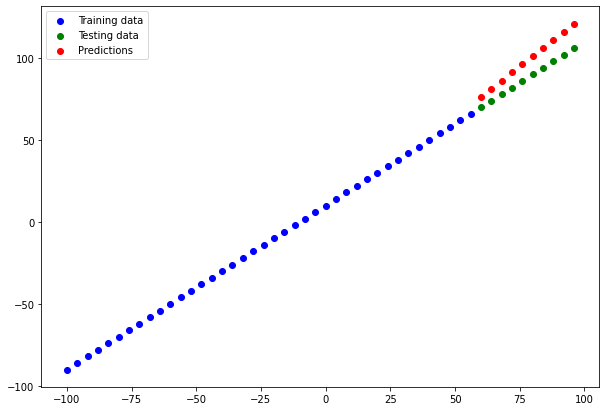

In [ ]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.
Since we are working on regression, two of the main metrics are:
* MAE - mean absolute error- on average how wrong yor model's predictions is
* MSE - mean square error -square the avg

In [ ]:
# Evaluate the model on the test data
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 156ms/step - loss: 10.6884 - mae: 10.6884


[10.688445091247559, 10.688445091247559]

In [ ]:
# Calculate the mean absolute error
tf.keras.losses.MAE(y_test,y_pred)
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.688445>

In [ ]:
#y_test and y_pred are not with the same shape =(10,) so we have to use squeeze function
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.312386,  81.28485 ,  86.2573  ,  91.22976 ,  96.20222 ,
       101.174675, 106.147125, 111.11959 , 116.09205 , 121.0645  ],
      dtype=float32)>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=122.044655>

In [ ]:
# Make two functions to define mae and mse

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model->fit it-> evaluate it->tweak it -> fit it -> evaulate it ....
````

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger - i.e more complex by adding extra layers or more hidden units to each layer
3. Train for longer- give your model the chance to find patterns in the data

Let's do 3 modeling experiments

1. `model_1`, same as the original model, 1 layer trained for 100 epochs
2. `model_2`, 2 layers, trained for 100 epochs
3. `model_3`, 2 layers, trained for 500 epochs

**Build `model_1`** 

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model_1 = tf.keras.Sequential([
          tf.keras.layers.Dense(1, input_shape=[1], name="Input_layer")
])

# compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"]
                )

# fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

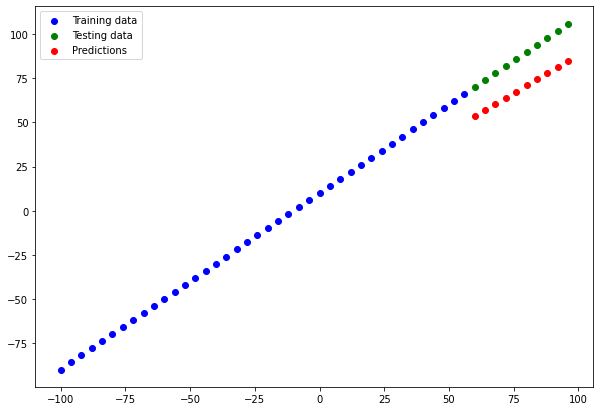

In [ ]:
# Make and plot predictions for model_1

y_preds_1 =  model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate mae and mse as evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`**
2 dense layers, trained for 100 epochs

In [ ]:
#set the random seed
tf.random.set_seed(42)
# Create model_2
model_2 = tf.keras.Sequential([
      tf.keras.layers.Dense(10, input_shape=[1]),
      tf.keras.layers.Dense(1, input_shape=[1])
])

# compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#fit it
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/100
2/2 [==============================] - 0s 8

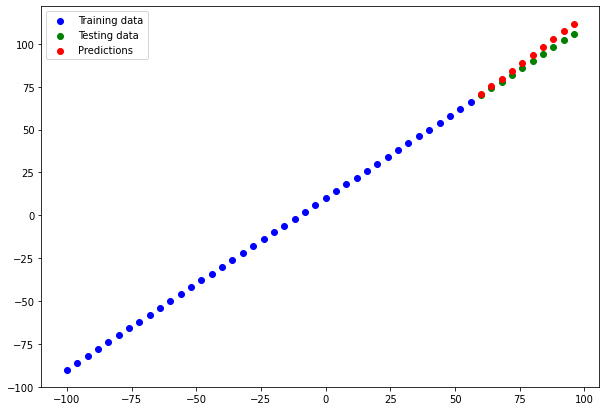

In [ ]:
# make and plot predictions on model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# calculate the model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build `model-3`**
2 layers, trained for 500 epochs

In [ ]:
# set random seed
tf.random.set_seed(42)

# create model_3
model_3 = tf.keras.Sequential([
          tf.keras.layers.Dense(10, input_shape=[1]),
          tf.keras.layers.Dense(1, input_shape=[1])
])

# compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# fit the model
model_3.fit(X_train,y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 5ms/

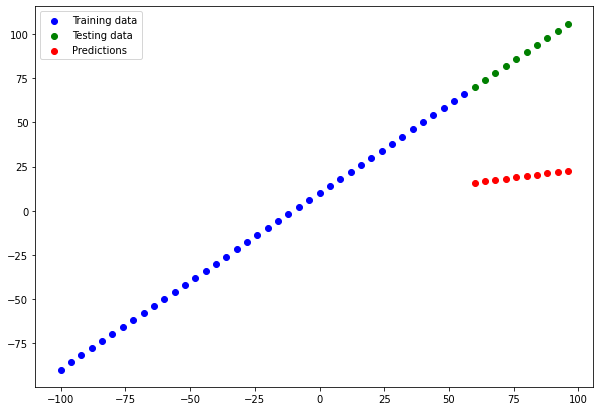

In [ ]:
# Make and plot predictions of model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# print evaluation metrics of model_3
mae_3 = mae(X_test, y_preds_3)
mse_3 = mse(X_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

### Comparing the results of our experiments

We've run a few experiments, that's compare them

In [ ]:
# Let's compare our models' results using a pandas data frame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["models", "mae", "mse"])
all_results

,models,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Looks like that `model_2` performed best..

### Tracking your experiments

One really good habit in ML modelling is to track the results of your experiments

And when doing so, it can be tedious if you're running lots of experiments

Luckily there are tools to help us!

**Resource:** As you build more models you will look into using\

* [TensorBoard](https://www.tensorflow.org/tensorboard) - a component of tensorflow library to help track modelling experiments
* [Weights and biases](http://wandb.com)- a tool for tracking all kinds of ML experiments (plus straight into TensorBoard)


## Saving our models

Saving our models allow us to use them outside of Google Colab or wherever they were trained such as in a web  app or mobile app.

There are two main formats we can save our model to:
1. the SavedModel format
2. HDF5 format



In [ ]:
# save the model
model_2.save("best_model_savedModel_format")

INFO:tensorflow:Assets written to: best_model_savedModel_format/assets


In [ ]:
model_2.save("best_model_HDF5_format.h5")

## Loading a saved model

In [ ]:
# load from a savedModel format
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_savedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compare model_2 predictions with the SavedModel format
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds=loaded_SavedModel_format.predict(X_test)

model_2_preds==loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load a model using .h5 format
loaded_h5_format = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compare the metrics
loaded_h5_format_preds=loaded_h5_format.predict(X_test)

model_2_preds == loaded_h5_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# compare the MAE and MSE between our model and the loaded ones

#mae(y_test, model_2_preds) == mae(y_test, loaded_SavedModel_format_preds)

mae(y_test, model_2_preds) == mae(y_test, loaded_h5_format_preds)

# now mse
mse(y_test, model_2_preds) == mse(y_test, loaded_h5_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## Download a model (or any file) from Google Colab

In [ ]:
# Download a file from Google Colab

from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Saving a file from Google Colab to Google Drive (this requires to mount your google drive and grant required permissions)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/TensorFlow_Course

In [ ]:
!ls /content/drive/MyDrive/TensorFlow_Course

best_model_HDF5_format.h5


### A larger Example

Use kaggle.com resource for different datasets on ML




In [ ]:
# import the right libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read in the insurance dataset from github (rawdata enabled)
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# let's do the one-hot-encoded where categorical columns turn into numerical ones
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X and y values (features and labels)

X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
#view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
#view y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)
len(X_train), len(X_test), len(X)

(1070, 268, 1338)

In [ ]:
# Build a neural network

#1. create a model
tf.random.set_seed(42)
insurance_model=tf.keras.Sequential([
                tf.keras.layers.Dense(10, input_shape=[11]),
                tf.keras.layers.Dense(1, input_shape=[1])
])

#2.compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. fit the model
insurance_model.fit(tf.squeeze(X_train), y_train, epochs=100)
#insurance_model.summary()

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
# check the results of the insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
# let's try one of the 3 options to improve our model
#set random seed
tf.random.set_seed(42)

# create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[11]),
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1, input_shape=[1])
])

#compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13310.7373 - mae: 13310.7373
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13273.1016 - mae: 13273.1016
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13218.5830 - mae: 13218.5830
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13135.9414 - mae: 13135.9414
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 13012.6992 - mae: 13012.6992
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 12833.9033 - mae: 12833.9033
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12584.5000 - mae: 12584.5000
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12247.6895 - mae: 12247.6895
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 11808.0293 - mae: 11808.0293
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11263.28

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 6417.2144 - mae: 6417.2144


[6417.21435546875, 6417.21435546875]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
#set seed
tf.random.set_seed(42)

# create the model
insurance_model_3 = tf.keras.Sequential([
        tf.keras.layers.Dense(100, input_shape=[11]),
        tf.keras.layers.Dense(10, input_shape=[1]),
        tf.keras.layers.Dense(1, input_shape=[1])
])

# compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7409.0811 - mae:

In [ ]:
# evaulate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Text(0.5, 0, 'epochs')

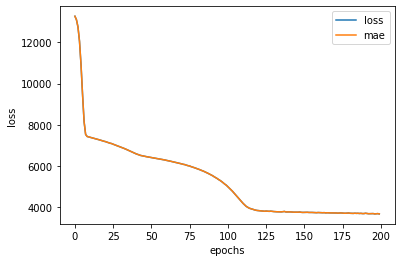

In [ ]:
#plot history known as loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**How long you should train for???**

It depends..
Check tensorflow [***EarlyStoppingCallback***] is a TensorFlow component which you can add to your model and will stop training once it stop improving a certain metric.


### Preprocessing Data (normalization and standardization)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read insurance data frame
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# To prepare our data we are going to use some classes from scikit-Learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transformer
ct = make_column_transformer(
   (MinMaxScaler(), ["age", "bmi", "children"]), #turn all values in these columns between 0 and 1 
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)

# transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [ ]:
# what does our data look like
X_train.loc[0]

X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
# Build a neural network model to fit our normalized data
tf.random.set_seed(42)

# create the model
insurance_model_4 = tf.keras.Sequential([
      tf.keras.layers.Dense(100, input_shape=[11]),
      tf.keras.layers.Dense(10, input_shape=[1]),
      tf.keras.layers.Dense(1, input_shape=[1])
])

#compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11925.96

In [ ]:
# evaluate our model
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

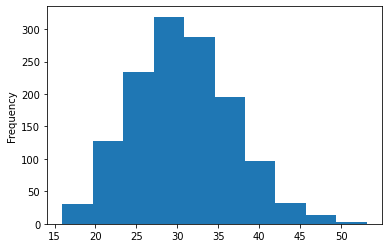

In [ ]:
X["bmi"].plot(kind="hist")

### Exercises for 01 session

# New Section

**Exercise 01:**

The exercises of the regression models


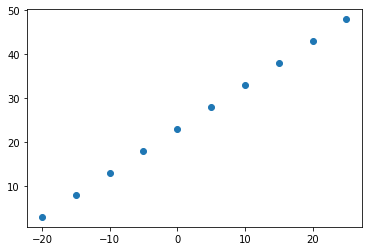

In [ ]:
#1.
import numpy as np
import matplotlib.pyplot as plt

# create features
array_X = np.array([-20.0,-15.0,-10.0,-5.0,0.0,5.0,10.0,15.0,20.0,25.0])

#create labels
array_y = np.array([3.0,8.0,13.0,18.0,23.0,28.0,33.0,38.0,43.0,48.0])


#visualize it
plt.scatter(array_X,array_y)


In [ ]:
#turn np arrays to tensor
DATA_X = tf.cast(tf.constant(array_X), dtype=tf.float32)
label_y = tf.cast(tf.constant(array_y), dtype=tf.float32)

In [ ]:
#make a bigger dataset
DATA_X = tf.range(-80,70, 3)
#len(DATA_X)
label_y = DATA_X + 13

In [ ]:
#creating two data sets
DATA_X_train = DATA_X[:40]
label_y_train = label_y[:40]

DATA_X_test = DATA_X[40:]
label_y_test = label_y[40:]

In [ ]:
# build a model; 1.create a model, compile and fit it
import tensorflow as tf

#set random seed
tf.random.set_seed(42)

first_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])
])

first_model.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.SGD(),
                    metrics=["mae"])
first_model.fit(DATA_X_train, label_y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 12.4745 - mae: 12.4745
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 11.9776 - mae: 11.9776
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 12.8897 - mae: 12.8897
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 10.5000 - mae: 10.5000
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4493 - mae: 9.4493
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.9182 - mae: 9.9182
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 9.9801 - mae: 9.9801
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4450 - mae: 9.4450
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 9.1495 - mae: 9.1495
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1909 - mae: 11.1909
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - los

In [ ]:
#2. build a neural network model with 4 Dense layers

tf.random.set_seed(42)

second_model = tf.keras.Sequential([
          tf.keras.layers.Dense(10, input_shape=[1]),
          tf.keras.layers.Dense(1),
          tf.keras.layers.Dense(1),
          tf.keras.layers.Dense(1)
])

second_model.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.SGD(),
                     metrics=["mae"])

second_model.fit(DATA_X_train, label_y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 20.5633 - mae: 20.5633
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 20.8921 - mae: 20.8921
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 20.1015 - mae: 20.1015
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 12.1250 - mae: 12.1250
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 15.9595 - mae: 15.9595
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 13.0424 - mae: 13.0424
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 15.3327 - mae: 15.3327
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 24.8233 - mae: 24.8233
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 9.6649 - mae: 9.6649
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 8.8894 - mae: 8.8894
Epoch 11/100
2/2 [==============================] - 0s 5ms/st

In [ ]:
second_model.evaluate(DATA_X_test, label_y_test), first_model.evaluate(DATA_X_test, label_y_test)

#Response: building this model with 4 Dense and do not change the other properties, evaluating is getting worse, the loss is higher 

1/1 [==============================] - 0s 37ms/step - loss: 22.0354 - mae: 22.0354


([42.66231155395508, 42.66231155395508],
 [22.035411834716797, 22.035411834716797])

In [ ]:
#3.a build a larger model(4Dense) with insurance dataset

import pandas as pd
# Read in the insurance dataset from github (rawdata enabled)
insurance_update = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_update


# let's do the one-hot-encoded where categorical columns turn into numerical ones
insurance_one_hot = pd.get_dummies(insurance_update)
insurance_one_hot.head()

# Create X and y values (features and labels)

X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
#view X


# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)



In [ ]:

#set seed
tf.random.set_seed(42)
insurance_update_model = tf.keras.Sequential([
      tf.keras.layers.Dense(10, input_shape=[11]),
      tf.keras.layers.Dense(1, input_shape=[1]),
      tf.keras.layers.Dense(1, input_shape=[1]),
      tf.keras.layers.Dense(1, input_shape=[1])
])

insurance_update_model.compile(loss=tf.keras.losses.mae,
                               optimizer=tf.keras.optimizers.Adam(),
                               metrics=["mae"])

insurance_update_model.fit(tf.squeeze(X_train), y_train, epochs=100, verbose=1)

#check the shape of X_train and y_train if they are compatible, if not squeeze


Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13343.8984 - mae: 13343.8984
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.6406 - mae: 13333.6406
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13319.2939 - mae: 13319.2939
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13298.5176 - mae: 13298.5176
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13268.5762 - mae: 13268.5762
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13225.9893 - mae: 13225.9893
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13167.3223 - mae: 13167.3223
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13088.2119 - mae: 13088.2119
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12983.0371 - mae: 12983.0371
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 12845.54

In [ ]:
#3.b increase the nr of units in each layer

#set seed
tf.random.set_seed(42)
insurance_update_model_2 = tf.keras.Sequential([
      tf.keras.layers.Dense(50, input_shape=[11]),
      tf.keras.layers.Dense(10, input_shape=[1]),
      tf.keras.layers.Dense(10, input_shape=[1]),
      tf.keras.layers.Dense(1, input_shape=[1])
])

insurance_update_model_2.compile(loss=tf.keras.losses.mae,
                               optimizer=tf.keras.optimizers.Adam(),
                               metrics=["mae"])

insurance_update_model_2.fit(tf.squeeze(X_train), y_train, epochs=100, verbose=1)

#check the shape of X_train and y_train if they are compatible, if not squeeze


Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13330.8330 - mae: 13330.8330
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13225.6992 - mae: 13225.6992
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12883.8516 - mae: 12883.8516
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11886.6631 - mae: 11886.6631
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 9766.5117 - mae: 9766.5117
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7697.7173 - mae: 7697.7173
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7434.3276 - mae: 7434.3276
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7400.2676 - mae: 7400.2676
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7371.4292 - mae: 7371.4292
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7344.7959 - mae: 7

In [ ]:
#3.c add the parameter of learning_rate and increase it


#set seed
tf.random.set_seed(42)
insurance_update_model_X = tf.keras.Sequential([
      tf.keras.layers.Dense(50, input_shape=[11]),
      tf.keras.layers.Dense(1, input_shape=[1]),
      tf.keras.layers.Dense(1, input_shape=[1]),
      tf.keras.layers.Dense(1, input_shape=[1])
])

insurance_update_model_X.compile(loss=tf.keras.losses.mae,
                               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                               metrics=["mae"])

insurance_update_model_X.fit(X_train, y_train, epochs=100, verbose=1)




Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13041.1885 - mae: 13041.1885
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 9851.5664 - mae: 9851.5664
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7508.2695 - mae: 7508.2695
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7347.6187 - mae: 7347.6187
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7258.7539 - mae: 7258.7539
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7154.1826 - mae: 7154.1826
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7040.0181 - mae: 7040.0181
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 6895.5767 - mae: 6895.5767
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 6736.3247 - mae: 6736.3247
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 6569.8838 - mae: 6569.88

In [ ]:
#3.d change the nr of epochs to 200 instead of 100

#set seed
tf.random.set_seed(42)
insurance_update_model_3 = tf.keras.Sequential([
      tf.keras.layers.Dense(50, input_shape=[11]),
      tf.keras.layers.Dense(10, input_shape=[1]),
      tf.keras.layers.Dense(10, input_shape=[1]),
      tf.keras.layers.Dense(1, input_shape=[1])
])

insurance_update_model_3.compile(loss=tf.keras.losses.mae,
                               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                               metrics=["mae"])

insurance_update_model_3.fit(tf.squeeze(X_train), y_train, epochs=200)




Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 11440.4443 - mae: 11440.4443
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 7623.7261 - mae: 7623.7261
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7249.5830 - mae: 7249.5830
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7003.8608 - mae: 7003.8608
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 6691.3584 - mae: 6691.3584
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6364.1348 - mae: 6364.1348
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 6193.8535 - mae: 6193.8535
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 6032.6284 - mae: 6032.6284
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 5611.2490 - mae: 5611.2490
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 4921.2446 - mae: 4921.24

In [ ]:
print("Evaluation of model_1: ",insurance_update_model.evaluate(X_test, y_test))
print("Evaluation of model_2: ",insurance_update_model_2.evaluate(X_test, y_test))
print("Evaluation of model_3: ",insurance_update_model_3.evaluate(X_test, y_test))


9/9 [==============================] - 0s 2ms/step - loss: 6846.2090 - mae: 6846.2090
Evaluation of model_1:  [6846.208984375, 6846.208984375]
9/9 [==============================] - 0s 2ms/step - loss: 3625.6494 - mae: 3625.6494
Evaluation of model_2:  [3625.6494140625, 3625.6494140625]
9/9 [==============================] - 0s 2ms/step - loss: 3199.7131 - mae: 3199.7131
Evaluation of model_3:  [3199.713134765625, 3199.713134765625]


In [ ]:
#4. Boston pricing dataset

(boston_X_train, boston_y_train), (boston_X_test, boston_y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

boston_X_train.shape, boston_y_train.shape

((404, 13), (404,))

In [ ]:
#build the model with 4 dense layers 

tf.random.set_seed(42)
boston_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
])

boston_model.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["mae"])

history=boston_model.fit(boston_X_train, boston_y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 25.0268 - mae: 25.0268
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 9.8701 - mae: 9.8701
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 7.4828 - mae: 7.4828
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 6.7800 - mae: 6.7800
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 6.5823 - mae: 6.5823
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 6.3931 - mae: 6.3931
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 6.4243 - mae: 6.4243
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 6.3229 - mae: 6.3229
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 6.3594 - mae: 6.3594
Epoch 10/100
13/13 [==============================] - 0s 6ms/step - loss: 6.2076 - mae: 6.2076
Epoch 11/100
13/13 [==============================] - 0s 

In [ ]:
#evaluate the model
boston_model.evaluate(boston_X_test, boston_y_test)

4/4 [==============================] - 0s 5ms/step - loss: 4.6463 - mae: 4.6463


[4.646329879760742, 4.646329879760742]

Text(0.5, 0, 'epochs')

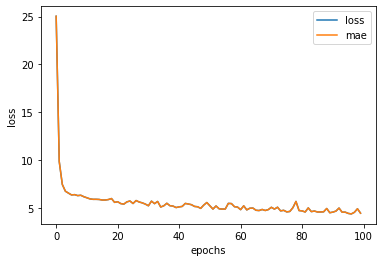

In [ ]:
#plot the loss/epochs
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

#DONE!!!